## Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Load dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset Phyton/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

##Sigma Rule for Feature Removal

In [5]:
# Find out if there is any potential of duplicated columns or not based on column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

There is no suspected duplicate column

In [6]:
# TotalCharge Data type is object. TotalCharge needed to be replace to float
df ["TotalCharges"] = pd.to_numeric(df.TotalCharges,errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Find out if there is any potential of duplicated rows
df.duplicated().sum()

0

In [8]:
# Find out if there is Missing Value Information
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Missing Value Information in Percentage
(100.00 * df.isnull().sum()) / df.shape[0]

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

Missing value is 15.6183% of TotalCharge

There is 11 or  missing value information at TotalCharges

There is no duplicate row

In [10]:
df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Since TotalCharges feature has relatively high gap between max and min value and high standard deviation, so its better to transform into categorical. First of all, we should fill the null values with median based on "gender", "SeniorCitizen", "Partner", "Dependents" to shape better pattern of data.

In [11]:
# Missing value handling
df["TotalCharges"] = df.groupby(["gender", "SeniorCitizen", "Partner", "Dependents"])["TotalCharges"].apply(lambda x: x.fillna(x.median()))
# Create age group by 10 groups
df["TotalCharges"] = pd.qcut(df["TotalCharges"], 10)
df["TotalCharges"].head()

0       (18.799, 84.61]
1    (1399.35, 2043.71]
2       (84.61, 267.37]
3    (1399.35, 2043.71]
4       (84.61, 267.37]
Name: TotalCharges, dtype: category
Categories (10, interval[float64, right]): [(18.799, 84.61] < (84.61, 267.37] < (267.37, 552.82] <
                                            (552.82, 946.7] ... (2043.71, 3132.75] <
                                            (3132.75, 4471.44] < (4471.44, 5973.69] <
                                            (5973.69, 8684.8]]

In [12]:
# TotalCharges group distribution by customerID
df.groupby(["TotalCharges"])["customerID"].count()

TotalCharges
(18.799, 84.61]       705
(84.61, 267.37]       704
(267.37, 552.82]      704
(552.82, 946.7]       704
(946.7, 1399.35]      705
(1399.35, 2043.71]    704
(2043.71, 3132.75]    705
(3132.75, 4471.44]    703
(4471.44, 5973.69]    704
(5973.69, 8684.8]     705
Name: customerID, dtype: int64

Total Charge has been grouped into 10 categories.
We need to grouped other numerical fatures into grouped

In [13]:
for i in df.columns:
    total_unique_values = len(df[i].unique())
    print(f"Unique value of {i} is {total_unique_values}")

Unique value of customerID is 7043
Unique value of gender is 2
Unique value of SeniorCitizen is 2
Unique value of Partner is 2
Unique value of Dependents is 2
Unique value of tenure is 73
Unique value of PhoneService is 2
Unique value of MultipleLines is 3
Unique value of InternetService is 3
Unique value of OnlineSecurity is 3
Unique value of OnlineBackup is 3
Unique value of DeviceProtection is 3
Unique value of TechSupport is 3
Unique value of StreamingTV is 3
Unique value of StreamingMovies is 3
Unique value of Contract is 3
Unique value of PaperlessBilling is 2
Unique value of PaymentMethod is 4
Unique value of MonthlyCharges is 1585
Unique value of TotalCharges is 10
Unique value of Churn is 2


In [14]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
961,4378-BZYFP,Male,0,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.50,"(267.37, 552.82]",No
2321,9776-OJUZI,Female,1,No,No,65,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),95.45,"(5973.69, 8684.8]",No
2544,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,"(552.82, 946.7]",No
5060,6133-OZILE,Female,0,No,No,18,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,35.20,"(552.82, 946.7]",No
2907,0611-DFXKO,Male,0,Yes,No,20,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.00,"(1399.35, 2043.71]",Yes


Mothly Charges and tenure is numerical value. Before i grouped it, i need to handle outlier

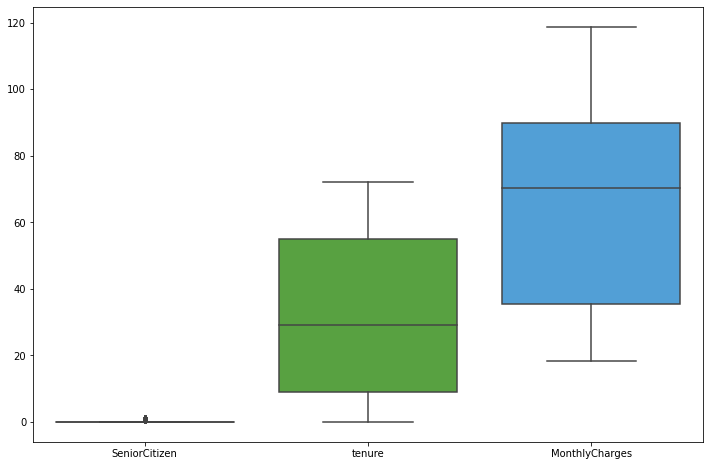

In [15]:
# Use Boxplot

# Figure Size Setting
plt.figure(figsize=(12,8))

# Boxplot using Seaborn
sns.boxplot(data=df, 
            palette="husl")

# Show the plot
plt.show()


No outlier found
There is no outlier at "Senior Citizen" because the data is 0 or 1
Therefore, data removal is not needed

In [16]:
# Create Monthly group by 10 groups
df["MonthlyCharges"] = pd.qcut(df["MonthlyCharges"], 10)
df["MonthlyCharges"].head()

0    (25.05, 45.85]
1    (45.85, 58.83]
2    (45.85, 58.83]
3    (25.05, 45.85]
4     (70.35, 79.1]
Name: MonthlyCharges, dtype: category
Categories (10, interval[float64, right]): [(18.249, 20.05] < (20.05, 25.05] < (25.05, 45.85] <
                                            (45.85, 58.83] ... (79.1, 85.5] < (85.5, 94.25] <
                                            (94.25, 102.6] < (102.6, 118.75]]

In [17]:
# Create tenure group by 10 groups
df["tenure"] = pd.qcut(df["tenure"], 10)
df["tenure"].head()

0    (-0.001, 2.0]
1     (29.0, 40.0]
2    (-0.001, 2.0]
3     (40.0, 50.0]
4    (-0.001, 2.0]
Name: tenure, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 2.0] < (2.0, 6.0] < (6.0, 12.0] < (12.0, 20.0] <
                                            ... < (40.0, 50.0] < (50.0, 60.0] <
                                            (60.0, 69.0] < (69.0, 72.0]]

In [18]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1529,9764-REAFF,Female,0,Yes,No,"(50.0, 60.0]",Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),"(18.249, 20.05]","(946.7, 1399.35]",No
4755,8849-AYPTR,Male,0,Yes,No,"(29.0, 40.0]",Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,"(85.5, 94.25]","(2043.71, 3132.75]",No
4823,9732-KPKBW,Male,0,No,No,"(-0.001, 2.0]",Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,"(45.85, 58.83]","(18.799, 84.61]",Yes
5395,9095-HFAFX,Female,0,No,No,"(2.0, 6.0]",Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),"(79.1, 85.5]","(267.37, 552.82]",Yes
316,3973-SKMLN,Male,0,No,No,"(69.0, 72.0]",Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),"(18.249, 20.05]","(946.7, 1399.35]",No


Transform Categorical Data

In [19]:
# Checking Data
def different (dataframe):
  for i in dataframe:
    if dataframe[i].dtypes == 'object':
      print(f'{i}: {dataframe[i].unique()}')

different (df)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
df["MultipleLines"].replace({"No phone service": "No"}, inplace= True)
df["OnlineSecurity"].replace({"No internet service": "No"}, inplace= True)
df["OnlineBackup"].replace({"No internet service": "No"}, inplace= True)
df["DeviceProtection"].replace({"No internet service": "No"}, inplace= True)
df["TechSupport"].replace({"No internet service": "No"}, inplace= True)
df["StreamingTV"].replace({"No internet service": "No"}, inplace= True)
df["StreamingMovies"].replace({"No internet service": "No"}, inplace= True)

df.sample (5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1431,6718-BDGHG,Female,0,Yes,No,"(40.0, 50.0]",Yes,Yes,DSL,No,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),"(58.83, 70.35]","(2043.71, 3132.75]",No
3880,9470-RTWDV,Male,0,Yes,Yes,"(20.0, 29.0]",Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),"(79.1, 85.5]","(2043.71, 3132.75]",No
1886,6695-FRVEC,Male,0,Yes,Yes,"(60.0, 69.0]",Yes,No,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),"(58.83, 70.35]","(3132.75, 4471.44]",No
488,4472-LVYGI,Female,0,Yes,Yes,"(-0.001, 2.0]",No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),"(45.85, 58.83]","(1399.35, 2043.71]",No
2607,5539-TMZLF,Male,1,No,No,"(-0.001, 2.0]",Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,"(58.83, 70.35]","(18.799, 84.61]",Yes


In [21]:
# Replace Yes and No
replace_column = ["Partner", "Dependents", "PhoneService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV",
                  "StreamingMovies", "PaperlessBilling", "Churn", "MultipleLines"]
for i in replace_column:
  df[i].replace({"Yes":1, "No":0}, inplace=True)

df["gender"].replace({"Male": 1, "Female" : 0}, inplace= True)

df.sample (5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3801,5914-DVBWJ,0,1,0,0,"(12.0, 20.0]",1,1,Fiber optic,0,...,0,1,0,0,Month-to-month,1,Electronic check,"(79.1, 85.5]","(1399.35, 2043.71]",1
240,7301-ABVAD,0,0,0,0,"(69.0, 72.0]",1,1,DSL,0,...,1,1,1,1,Two year,0,Bank transfer (automatic),"(85.5, 94.25]","(5973.69, 8684.8]",0
948,7028-DVOIQ,1,1,0,0,"(29.0, 40.0]",1,1,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,"(94.25, 102.6]","(3132.75, 4471.44]",1
2685,5781-BKHOP,0,0,1,0,"(69.0, 72.0]",1,1,Fiber optic,1,...,1,0,1,0,Two year,0,Bank transfer (automatic),"(94.25, 102.6]","(5973.69, 8684.8]",0
4958,0060-FUALY,0,0,1,0,"(50.0, 60.0]",1,1,Fiber optic,1,...,0,0,1,0,Month-to-month,1,Electronic check,"(94.25, 102.6]","(4471.44, 5973.69]",0


In [22]:
# One-hot Encoding
# PaymentMethod
df["PaymentMethod"].value_counts().reset_index()

,index,PaymentMethod
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


In [23]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df = pd.get_dummies(df,columns = ["PaymentMethod"])
df.iloc[19]

customerID                                         4183-MYFRB
gender                                                      0
SeniorCitizen                                               0
Partner                                                     0
Dependents                                                  0
tenure                                           (20.0, 29.0]
PhoneService                                                1
MultipleLines                                               0
InternetService                                   Fiber optic
OnlineSecurity                                              0
OnlineBackup                                                1
DeviceProtection                                            1
TechSupport                                                 0
StreamingTV                                                 0
StreamingMovies                                             1
Contract                                       Month-to-month
Paperles

In [24]:
# 2. Ordinal Encoding applied for ordinal data scale 

# Lets use InternetService -> Based on Speed Level
df["InternetService"].value_counts().reset_index()

,index,InternetService
0,Fiber optic,3096
1,DSL,2421
2,No,1526


In [25]:
 #Use .map(class) to replace value by value using dictionary

internet_conn = {"No": 0, 
                "DSL": 1,
                "Fiber optic": 2}

df["InternetConnection"] = df["InternetService"].map(internet_conn)
df[["InternetService","InternetConnection"]].sample(10)

,InternetService,InternetConnection
7015,Fiber optic,2
2479,DSL,1
1997,Fiber optic,2
1191,DSL,1
3895,No,0
1794,DSL,1
1849,DSL,1
1461,Fiber optic,2
4822,Fiber optic,2
5895,DSL,1


In [26]:
# Dropping InternetService
df = df.drop(["InternetService"], axis=1)

In [27]:
# Lets use Contract
df["Contract"].value_counts().reset_index()

,index,Contract
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


In [28]:
# Use .map(class) to replace value by value using dictionary

contract_class = {"Month-to-month": 1, 
                "One year": 2,
                "Two year": 3}

df["ContractClass"] = df["Contract"].map(contract_class)
df[["Contract","ContractClass"]].sample(10)

,Contract,ContractClass
1848,One year,2
5113,Two year,3
6434,Month-to-month,1
5879,Two year,3
3442,Month-to-month,1
5998,Two year,3
3904,Month-to-month,1
6313,Month-to-month,1
6294,Month-to-month,1
606,Two year,3


In [29]:
# Dropping Contract
df = df.drop(["Contract"], axis=1)

Replace High Cardinality Data

In [30]:
# Dropping Customer ID
df = df.drop(["customerID"], axis=1)

In [31]:
# Replace high cardinality data "tenure", "MonthlyCharges", and "TotalCharges"
high_cardinality_data = ["tenure","MonthlyCharges", "TotalCharges"]

for feature in high_cardinality_data:        
    df[feature] = LabelEncoder().fit_transform(df[feature])

df = pd.get_dummies(df)
df.sample(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetConnection,ContractClass
4344,0,0,0,0,8,1,1,0,1,1,...,1,6,8,0,0,0,1,0,1,3
2950,1,0,0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,1
5583,0,1,1,0,4,1,0,0,1,0,...,0,6,6,1,0,0,1,0,2,1
4066,1,0,0,0,7,1,1,1,1,0,...,1,4,7,0,1,0,0,0,1,2
973,1,1,1,0,6,0,0,0,1,0,...,1,2,4,1,0,0,1,0,1,1
3300,0,0,1,1,5,1,0,0,0,0,...,0,1,3,0,0,0,0,1,0,2
4389,1,0,0,0,5,1,1,1,0,0,...,1,8,6,0,1,0,0,0,2,1
3408,0,0,0,0,1,1,0,0,1,0,...,0,3,1,1,0,1,0,0,1,1
1831,0,1,1,0,4,1,1,1,1,0,...,1,4,4,0,0,0,0,1,1,1
2256,0,0,0,1,3,1,0,1,1,1,...,0,4,4,0,0,1,0,0,1,2


## Modeling (Bebas dalam penggunaan model)

Bebas menggunakan model, mau menggunakan decision tree, random forest, xgboost, dll juga boleh<br><br>
silahkan berekspresi :)

In [41]:
df_balance = df
df_balance

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetConnection,ContractClass
0,0,0,1,0,0,0,0,0,1,0,...,1,2,0,0,0,0,1,0,1,1
1,1,0,0,0,5,1,0,1,0,1,...,0,3,5,0,0,0,0,1,1,2
2,1,0,0,0,0,1,0,1,1,0,...,1,3,1,1,0,0,0,1,1,1
3,1,0,0,0,6,0,0,1,0,1,...,0,2,5,0,1,0,0,0,1,2
4,0,0,0,0,0,1,0,0,0,0,...,1,5,1,1,0,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,4,1,1,1,0,1,...,1,6,5,0,0,0,0,1,1,2
7039,0,0,1,1,9,1,1,0,1,1,...,1,9,9,0,0,1,0,0,2,2
7040,0,0,1,1,2,0,0,1,0,0,...,1,2,2,0,0,0,1,0,1,1
7041,1,1,1,0,1,1,1,0,0,0,...,1,5,2,1,0,0,0,1,2,1


In [42]:
df_balance['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Imbalance Dataset

## Random Forest with Balance Dataset

In [43]:
# Handling Imbalance dataset using SMOTE
from imblearn import under_sampling, over_sampling

sm = over_sampling.SMOTE(random_state=42)

X = df_balance.drop(['Churn'],axis = 1)
Y = df_balance['Churn']
X_sm, y_sm = sm.fit_resample(X, Y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7043, 22)
Shape of X after SMOTE: (10348, 22)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: Churn, dtype: float64

In [44]:
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

**Split Dataset**

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

**Modelling with Random Forest**

In [46]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

Because we using balance dataset, we can use Accuracy

In [47]:
print('Akurasi',accuracy_score(y_test, preds))

Akurasi 0.8449942017781213


Accuracy of the model is 84.49%

## Random Forest with Imbalance dataset

In [48]:
df_imbalance = df
df_imbalance

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetConnection,ContractClass
0,0,0,1,0,0,0,0,0,1,0,...,1,2,0,0,0,0,1,0,1,1
1,1,0,0,0,5,1,0,1,0,1,...,0,3,5,0,0,0,0,1,1,2
2,1,0,0,0,0,1,0,1,1,0,...,1,3,1,1,0,0,0,1,1,1
3,1,0,0,0,6,0,0,1,0,1,...,0,2,5,0,1,0,0,0,1,2
4,0,0,0,0,0,1,0,0,0,0,...,1,5,1,1,0,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,4,1,1,1,0,1,...,1,6,5,0,0,0,0,1,1,2
7039,0,0,1,1,9,1,1,0,1,1,...,1,9,9,0,0,1,0,0,2,2
7040,0,0,1,1,2,0,0,1,0,0,...,1,2,2,0,0,0,1,0,1,1
7041,1,1,1,0,1,1,1,0,0,0,...,1,5,2,1,0,0,0,1,2,1


In [49]:
X = df_imbalance.drop(['Churn'],axis = 1)
Y = df_imbalance['Churn']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

**Modelling with Random Forest**

In [51]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

**Metric Evaluation**

Because we are using imbalance dataset, we can not use accuracy. We will evaluate using AUC and F1

In [52]:
cm = confusion_matrix(y_test, preds)
cm

array([[1149,  133],
       [ 251,  228]])

In [54]:
# calculate AUC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

print('AUC ',roc_auc_score(y_test, preds))

AUC  0.6861237497516602


In [55]:
# calculate F1 Score
print('F1 Score ',f1_score(y_test, preds))

F1 Score  0.5428571428571428


Precission and Recall

In [56]:
# calculate Precision
print('Precision ',precision_score(y_test, preds))

Precision  0.631578947368421


In [57]:
# calculate Recall
print('Recall ',recall_score(y_test, preds))

Recall  0.4759916492693111


AUC of the model is 68.61%
Precision of the model is 63.16%. 
Recall of the model is 47.60%

I choose Random forest with Balance Data because it has precission 84.50 rather than random forest with unbalance Data because it only has AUC 68.61%.